# Busqueda finobacci

### Función de prueba

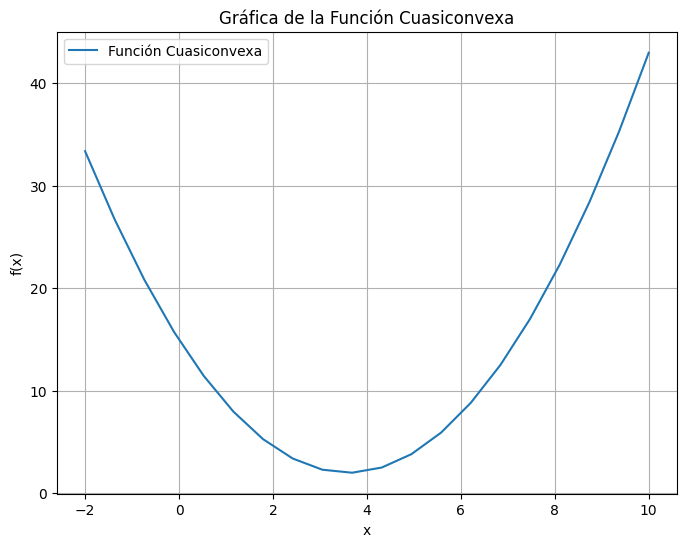

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return ((x-3.6)**2) +2

#Graficar función
# Generar valores de x
x_values = np.linspace(-2, 10, 20)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa')
plt.title('Gráfica de la Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

### Desarrollo de algoritmo

In [46]:
def fibonacci(n):
    """
    Calcula el n-ésimo número de la serie de Fibonacci.
    
    Args:
        n (int): El subíndice del número de Fibonacci a calcular
        
    Returns:
        int: El n-ésimo número de Fibonacci
    """
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for i in range(2, n + 1):
            a, b = b, a + b
        return b
    
#Ejemplo de uso
print(fibonacci(8))

21


In [47]:
#Selección de intervalo [a, b]
a = -2
b = 10

#logintud de incertidumbre
l = 1

#Constante de distinción
epsilon = 0.5

#Número máximo de iteraciones
def calcular_n_fibonacci(a, b, l):
    """
    Calcula n que cumpla: fibonacci(n) > (b - a) / l
    
    Args:
        a (float): Límite inferior del intervalo
        b (float): Límite superior del intervalo
        l (float): Longitud de incertidumbre
        
    Returns:
        int: El valor de n calculado
    """
    n = 1
    while fibonacci(n) <= (b - a) / l:
        n += 1
    return n

# Calcular n usando la función
n = calcular_n_fibonacci(a, b, l)

print(f"n calculado: {n}")
print(f"fibonacci({n}) = {fibonacci(n)}")
print(f"(b - a) / l = {(b - a) / l}")


#Calcular los puntos de prueba
lambda_1 = a + (fibonacci(n - 2) / fibonacci(n)) * (b - a)
mu_1 = a + (fibonacci(n - 1) / fibonacci(n)) * (b - a)

#Evaluar la función en los puntos de prueba
f_lambda_1 = quasiconvex_function(lambda_1)
f_mu_1 = quasiconvex_function(mu_1)

print(f"lambda_1: {lambda_1}, f(lambda_1): {f_lambda_1}")
print(f"mu_1: {mu_1}, f(mu_1): {f_mu_1}")

while n > 2 and (b - a) > l:
    if f_lambda_1 > f_mu_1:
        a = lambda_1
        lambda_1 = mu_1
        f_lambda_1 = f_mu_1
        mu_1 = a + (fibonacci(n - 1) / fibonacci(n)) * (b - a)
        f_mu_1 = quasiconvex_function(mu_1)
    else:  
        b = mu_1
        mu_1 = lambda_1
        f_mu_1 = f_lambda_1
        lambda_1 = a + (fibonacci(n - 2) / fibonacci(n)) * (b - a)
        f_lambda_1 = quasiconvex_function(lambda_1)
    n -= 1
    print(f"Intervalo actual: [{a}, {b}]")
print(f"Intervalo final: [{a}, {b}]")
   

n calculado: 7
fibonacci(7) = 13
(b - a) / l = 12.0
lambda_1: 2.615384615384616, f(lambda_1): 2.969467455621301
mu_1: 5.384615384615385, f(mu_1): 5.184852071005919
Intervalo actual: [-2, 5.384615384615385]
Intervalo actual: [0.8402366863905328, 5.384615384615385]
Intervalo actual: [2.615384615384616, 5.384615384615385]
Intervalo actual: [2.615384615384616, 4.276923076923078]
Intervalo actual: [3.1692307692307695, 4.276923076923078]
Intervalo final: [3.1692307692307695, 4.276923076923078]


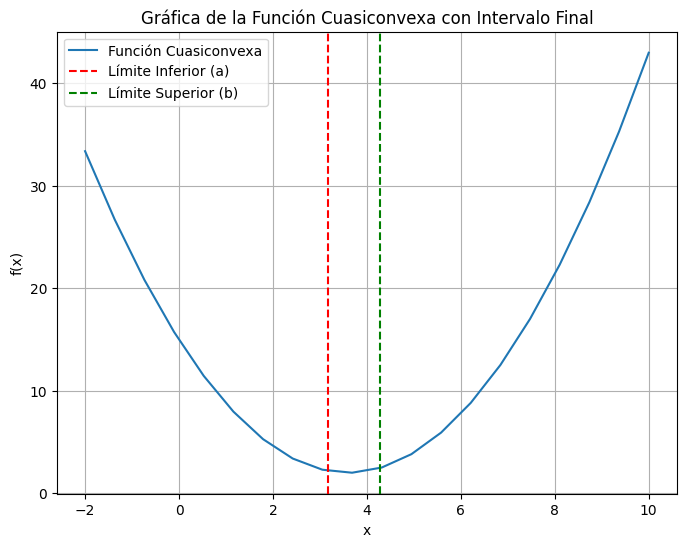

In [48]:
# Graficar la función base
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa')

# Agregar las líneas verticales para los límites del intervalo final
plt.axvline(x=a, color='r', linestyle='--', label='Límite Inferior (a)')
plt.axvline(x=b, color='g', linestyle='--', label='Límite Superior (b)')

plt.title('Gráfica de la Función Cuasiconvexa con Intervalo Final')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()